In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [87]:
df=pd.read_csv("data1.csv")

In [88]:
df.head(2)

,Name,Python,Machine Learning
0,jay,90.0,NaN
1,raj,NaN,89.0


In [89]:
df.tail()

,Name,Python,Machine Learning
5,viraj,65.0,56.0
6,vijay,45.0,67.0
7,sumit,80.0,45.0
8,akash,70.0,67.0
9,sujit,NaN,NaN


In [90]:
df.info() # Python - 4
# ML -- 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              10 non-null     object 
 1   Python            6 non-null      float64
 2   Machine Learning  7 non-null      float64
dtypes: float64(2), object(1)
memory usage: 372.0+ bytes


In [91]:
df.describe() # Python - skewness -- mean<median -- negative skewness
# Ml -- mean>median -- +ve skewness

,Python,Machine Learning
count,6.000000,7.000000
mean,71.333333,69.857143
std,15.513435,16.087558
min,45.000000,45.000000
25%,66.250000,61.500000
50%,74.000000,67.000000
75%,79.500000,82.500000
max,90.000000,89.000000


<Axes: xlabel='Python', ylabel='Density'>

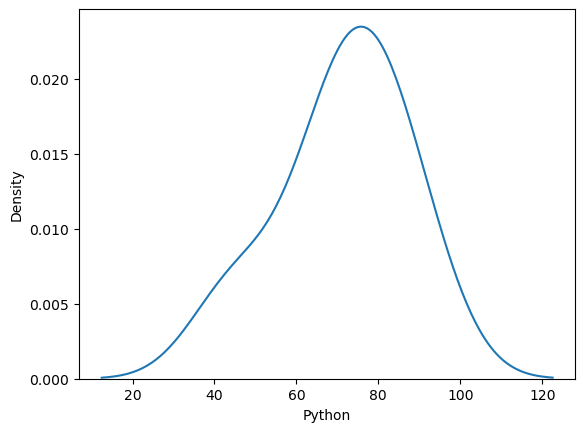

In [92]:
sns.kdeplot(df["Python"])

<Axes: xlabel='Machine Learning', ylabel='Density'>

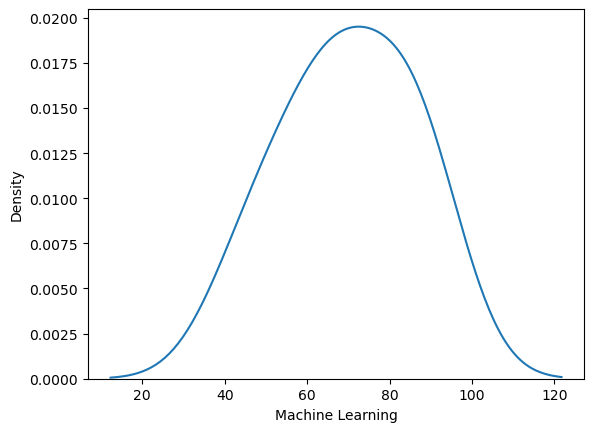

In [93]:
sns.kdeplot(df["Machine Learning"])

In [94]:
# null values remove
#df.dropna(inplace=True)
#df=df.dropna()
df.dropna()

,Name,Python,Machine Learning
2,kumar,78.0,78.0
5,viraj,65.0,56.0
6,vijay,45.0,67.0
7,sumit,80.0,45.0
8,akash,70.0,67.0


In [95]:
(df.isnull().sum()/len(df))*100 # calculating percentage of missing values

Name                 0.0
Python              40.0
Machine Learning    30.0
dtype: float64

In [96]:
df["Python"]=df["Python"].fillna(df["Python"].median())

In [97]:
df["Machine Learning"].fillna(df["Machine Learning"].median(),inplace=True)

In [98]:
df.isnull().sum()

Name                0
Python              0
Machine Learning    0
dtype: int64

In [99]:
df=pd.read_csv("cars.csv")
df.head() #target - price 

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [100]:
df.info()
# normalized-losses
# horsepower

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.2+ KB


In [101]:
df["normalized-losses"].value_counts() # ?      41
df["normalized-losses"].replace("?",np.nan,inplace=True)

In [102]:
(df["normalized-losses"].isnull().sum()/len(df))*100 #-- 20 % missing value

np.float64(20.0)

In [103]:
df["normalized-losses"]=df["normalized-losses"].astype("float")

In [104]:
df["normalized-losses"].mean()>df["normalized-losses"].median() # +ve skewne

np.True_

In [105]:
df["normalized-losses"].fillna(df["normalized-losses"].median(),inplace=True)

In [106]:
df["horsepower"].value_counts() # 2 ?
df["horsepower"].replace("?",np.nan,inplace=True)
df["horsepower"]=df["horsepower"].astype("float")
print((df["horsepower"].isnull().sum()/len(df))*100 ) # 0.97

0.975609756097561


In [107]:
df["horsepower"].mean()>df["horsepower"].median()

np.True_

In [108]:
df["horsepower"].fillna(df["horsepower"].median(),inplace=True)

In [109]:
# outlier processing

<Axes: xlabel='price', ylabel='Density'>

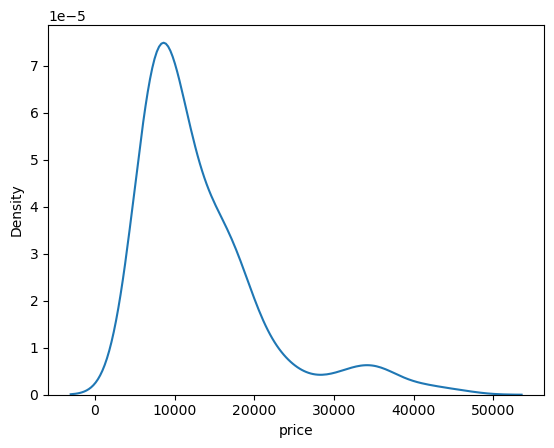

In [110]:
sns.kdeplot(df["price"]) # +vely skewed

In [111]:
df["price"].describe()# mean     13227.478049 > 50%      10345.000000
#+ve skewness

count      205.000000
mean     13227.478049
std       7902.651615
min       5118.000000
25%       7788.000000
50%      10345.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

<Axes: ylabel='price'>

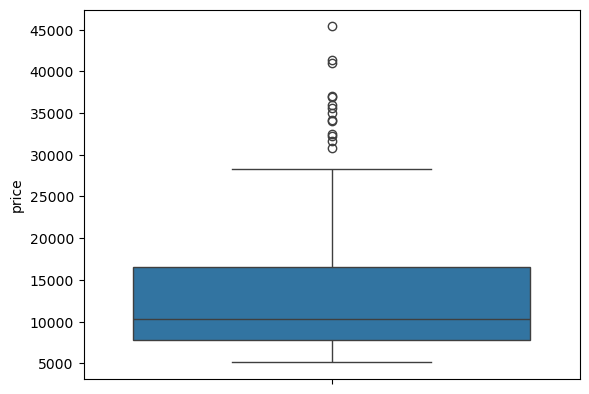

In [112]:
sns.boxplot(df["price"])

In [113]:
df["make"].value_counts()

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
chevrolet         3
jaguar            3
renault           2
mercury           1
Name: count, dtype: int64

<Axes: xlabel='price', ylabel='make'>

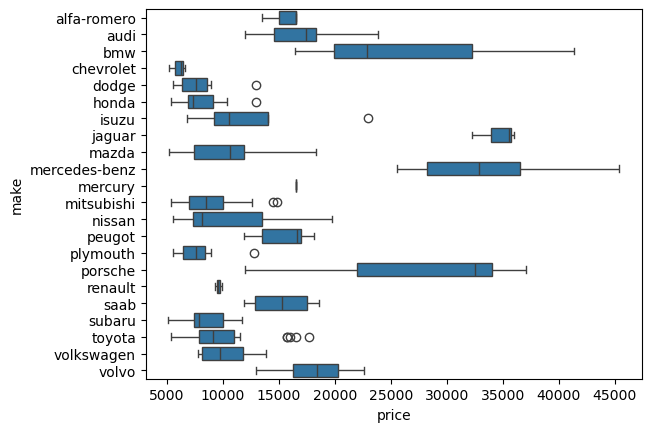

In [114]:
sns.boxplot(data=df,y="make",x="price")

In [115]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [116]:
import plotly.express as px
px.box(df,x=df["price"],y=df["make"])

In [117]:
def identify_outliers(group):
    q1=group["price"].quantile(0.25)
    q3=group["price"].quantile(0.75)
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    outliers=group[(group["price"]<lw)|(group["price"]>uw)]
    return outliers[["make","price"]]

In [118]:
df.groupby("make").apply(identify_outliers)

make  price
make                             
dodge      29        dodge  12964
honda      41        honda  12945
isuzu      45        isuzu  23000
mitsubishi 83   mitsubishi  14869
           84   mitsubishi  14489
plymouth   124    plymouth  12764
toyota     172      toyota  17669
           178      toyota  16558
           179      toyota  15998
           180      toyota  15690
           181      toyota  15750

In [119]:
def replacing_outliers(group):
    q1=group["price"].quantile(0.25)
    q3=group["price"].quantile(0.75)
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    group["price"]=group["price"].apply(lambda x:min(max(x,lw),uw))
    return group
                                        
    

In [120]:
df=df.groupby("make").apply(replacing_outliers).reset_index(drop=True)

<Axes: xlabel='price', ylabel='make'>

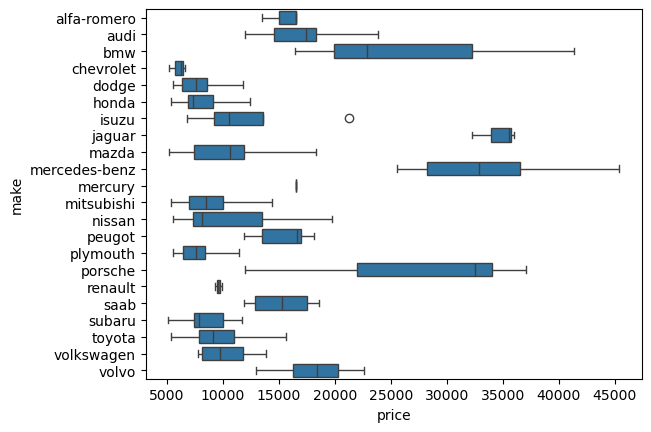

In [121]:
sns.boxplot(data=df,y="make",x="price")

In [122]:
# Skewness removal

In [123]:
from scipy.stats import skew

In [124]:
numerical_cols=df.select_dtypes(["int","float"]).columns
numerical_cols

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [125]:

for i in numerical_cols:
    print(f"{i} : {skew(df[i])} ") 
'''
normalized-losses : 0.9689566830169458 
width : 0.8973753485201392
engine-size : 1.9333748457840114 
horsepower : 1.3931510049522813 
price : 1.8132747028799934 
'''

symboling : 0.20952469094997359 
normalized-losses : 0.9689566830169458 
width : 0.8973753485201392 
height : 0.06265991683394276 
engine-size : 1.9333748457840114 
horsepower : 1.3931510049522813 
city-mpg : 0.6588377533622138 
highway-mpg : 0.5360379305163596 
price : 1.8132747028799934 


'\nnormalized-losses : 0.9689566830169458 \nwidth : 0.8973753485201392\nengine-size : 1.9333748457840114 \nhorsepower : 1.3931510049522813 \nprice : 1.8132747028799934 \n'

In [126]:
df[numerical_cols].corr()["price"].sort_values()
'''
# HIghly correlated 
highway-mpg         -0.679232
city-mpg            -0.655077
width                0.720006
horsepower           0.746189
engine-size          0.852845
# skewness removal candidates
normalized-losses : 0.9689566830169458 
'''

'\n# HIghly correlated \nhighway-mpg         -0.679232\ncity-mpg            -0.655077\nwidth                0.720006\nhorsepower           0.746189\nengine-size          0.852845\n# skewness removal candidates\nnormalized-losses : 0.9689566830169458 \n'

In [127]:
np.sqrt(-25)

np.float64(nan)

In [128]:
np.log(-25)

np.float64(nan)

In [129]:
len(df[df["normalized-losses"]<0])

0

In [130]:
df["normalized-losses"]=np.log(df["normalized-losses"])
print(skew(df["normalized-losses"]))

0.17095064676203378


<Axes: xlabel='normalized-losses', ylabel='Density'>

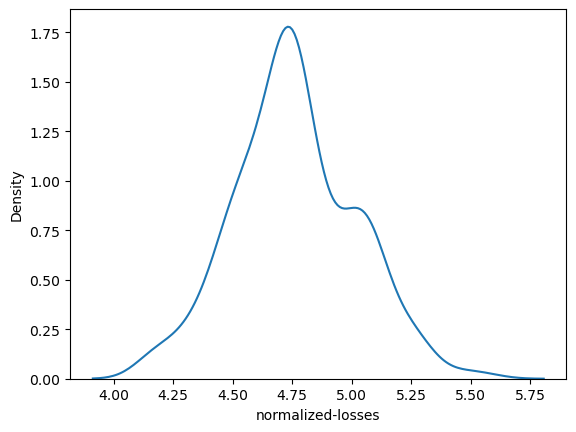

In [131]:
sns.kdeplot(df["normalized-losses"])

In [132]:
object_cols=df.select_dtypes("object").columns
object_cols

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

In [133]:
for i in object_cols:
    print(f"{i} has total different values : {df[i].nunique()}")

make has total different values : 22
fuel-type has total different values : 2
body-style has total different values : 5
drive-wheels has total different values : 3
engine-location has total different values : 2
engine-type has total different values : 7


In [134]:
for i in object_cols:
    print(f"{i} different values distribution: {df[i].value_counts()}")

make different values distribution: make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
chevrolet         3
jaguar            3
renault           2
mercury           1
Name: count, dtype: int64
fuel-type different values distribution: fuel-type
gas       185
diesel     20
Name: count, dtype: int64
body-style different values distribution: body-style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
drive-wheels different values distribution: drive-wheels
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64
engine-location different values distribution: engine-location
front    202
rear       3
Name: count, d

In [135]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
e=le.fit_transform(df["fuel-type"]) # fit(), transform(), fit_transform()
print(le.classes_)
print(e)
print(le.inverse_transform(e))
# fit() -- StandardScaler, fit(), transform()-- fit_transform()--

['diesel' 'gas']
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1]
['gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas'
 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas'
 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas'
 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas'
 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas'
 'gas' 'gas' 'gas' 'diesel' 'gas' 'gas' 'diesel' 'diesel' 'diesel'
 'diesel' 'diesel' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas'
 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 'gas' 

In [136]:
#le.fit_transform(df[["fuel-type","body-style","engine-type"]]) -- error

In [137]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df[object_cols]=enc.fit_transform(df[object_cols])

In [138]:
df[object_cols]

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0.0,1.0,0.0,2.0,0.0,0.0
1,0.0,1.0,0.0,2.0,0.0,0.0
2,0.0,1.0,2.0,2.0,0.0,5.0
3,1.0,1.0,3.0,1.0,0.0,3.0
4,1.0,1.0,3.0,0.0,0.0,3.0
...,...,...,...,...,...,...
200,21.0,1.0,3.0,2.0,0.0,3.0
201,21.0,1.0,3.0,2.0,0.0,3.0
202,21.0,1.0,3.0,2.0,0.0,5.0
203,21.0,0.0,3.0,2.0,0.0,3.0


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    float64
 3   fuel-type          205 non-null    float64
 4   body-style         205 non-null    float64
 5   drive-wheels       205 non-null    float64
 6   engine-location    205 non-null    float64
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    float64
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 24.2 KB


In [140]:
# Feature Scaling 

In [141]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'body-style',
       'drive-wheels', 'engine-location', 'width', 'height', 'engine-type',
       'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [142]:
features=df.drop("price",axis=1)
target=df["price"]

In [143]:
features.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'body-style',
       'drive-wheels', 'engine-location', 'width', 'height', 'engine-type',
       'engine-size', 'horsepower', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [144]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features.iloc[:]=scaler.fit_transform(features.iloc[:])
features.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,1.743470,-0.059233,-1.948256,0.328798,-3.050975,1.213330,-0.121867,-0.844782,-2.020417,-2.865105,0.074449,0.173309,-0.646553,-0.546059
1,1.743470,-0.059233,-1.948256,0.328798,-3.050975,1.213330,-0.121867,-0.844782,-2.020417,-2.865105,0.074449,0.173309,-0.646553,-0.546059
2,0.133509,-0.059233,-1.948256,0.328798,-0.717207,1.213330,-0.121867,-0.190566,-0.543527,1.886890,0.604046,1.263761,-0.953012,-0.691627
3,0.938490,1.342078,-1.788499,0.328798,0.449677,-0.589081,-0.121867,0.136542,0.235942,-0.013908,-0.431076,-0.054925,-0.186865,-0.109354
4,0.938490,1.342078,-1.788499,0.328798,0.449677,-2.391492,-0.121867,0.230001,0.235942,-0.013908,0.218885,0.274747,-1.106241,-1.273900


In [145]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.2, random_state=1)

In [146]:
print(xtrain.shape,ytrain.shape)

(164, 14) (164,)


In [147]:
print(xtest.shape,ytest.shape)

(41, 14) (41,)


In [148]:
#sns.pairplot(df) # linearity not present

<Axes: >

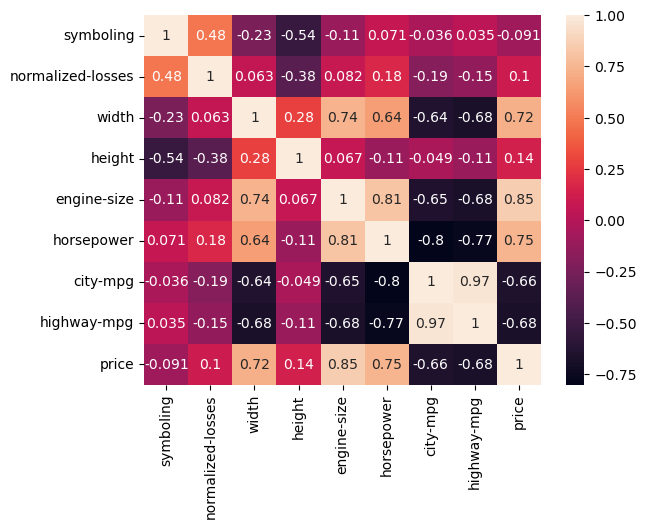

In [149]:
sns.heatmap(df[numerical_cols].corr(),annot=True) 
# multicollinearity present

In [150]:
df[numerical_cols].corr()["price"].sort_values()
"""
Negatively Correlated Column
highway-mpg         -0.679232
city-mpg            -0.655077
Positively Correlated Column 
width                0.720006
horsepower           0.746189
engine-size          0.852845
"""

'\nNegatively Correlated Column\nhighway-mpg         -0.679232\ncity-mpg            -0.655077\nPositively Correlated Column \nwidth                0.720006\nhorsepower           0.746189\nengine-size          0.852845\n'

In [151]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain) #
ypred=lr.predict(xtest)

In [152]:
f=pd.DataFrame({"Columns":xtrain.columns,
                "Coefficient":lr.coef_})
f

,Columns,Coefficient
0,symboling,89.225507
1,normalized-losses,-200.774131
2,make,-1227.843551
3,fuel-type,-129.765163
4,body-style,-160.333110
5,drive-wheels,1135.400329
6,engine-location,1943.579677
7,width,1754.440061
8,height,722.350653
9,engine-type,345.927713


In [153]:
lr.intercept_

np.float64(12998.814172468834)

In [154]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(ytest,ypred)
r2=r2_score(ytest,ypred)
print(f"MSE : {mse}")
print(f"R2 : {r2}")

MSE : 14173632.853311265
R2 : 0.7391441035336072


<Axes: ylabel='price'>

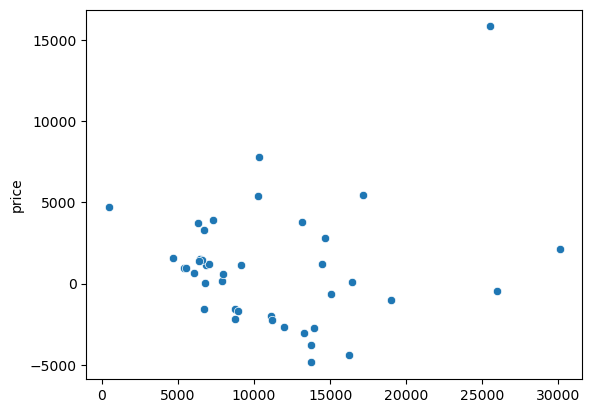

In [155]:
# homoscedascity
sns.scatterplot(x=ypred,y=(ytest-ypred)) # funnel shape variance -- not satisfied

<Axes: xlabel='price', ylabel='Density'>

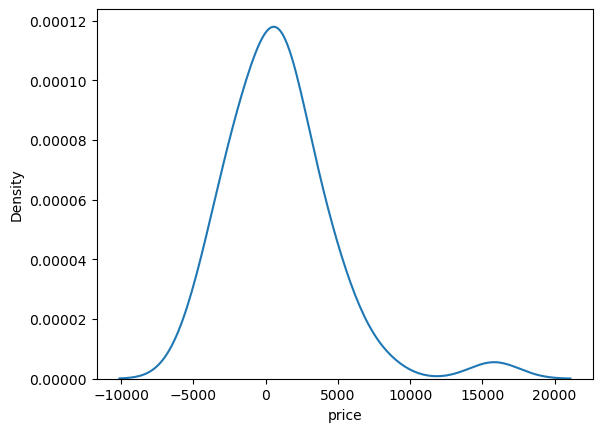

In [156]:
# Normality of residuals -- not satisfied
sns.kdeplot(ytest-ypred)

In [157]:
# Hyperparameter tuning to know the right degree
from sklearn.preprocessing import PolynomialFeatures
for i in range(2,8):
    poly = PolynomialFeatures(degree=i)
    xtrainp=poly.fit_transform(xtrain)
    xtestp=poly.transform(xtest)
    print(xtrainp.shape)
    l=LinearRegression()
    l.fit(xtrainp,ytrain)
    ypred=l.predict(xtestp)
    mse=mean_squared_error(ytest,ypred)
    r2=r2_score(ytest,ypred)
    print(f"MSE : {mse}")
    print(f"R2 : {r2}")
    print(f"""{i} : traini_score {l.score(xtrainp,ytrain)} 
         test_score {l.score(xtestp,ytest)}""")

(164, 120)
MSE : 60212928.056478485
R2 : -0.10817723935678525
2 : traini_score 0.9875865579401472 
         test_score -0.10817723935678525
(164, 680)
MSE : 61643562.26405504
R2 : -0.13450707113634097
3 : traini_score 0.9950522961444461 
         test_score -0.13450707113634097
(164, 3060)
MSE : 112722018.17003424
R2 : -1.0745706768025847
4 : traini_score 0.9950522961444461 
         test_score -1.0745706768025847
(164, 11628)
MSE : 196760728.9718817
R2 : -2.6212449466228587
5 : traini_score 0.9950522961444461 
         test_score -2.6212449466228587
(164, 38760)
MSE : 369620895.1242118
R2 : -5.802616587307154
6 : traini_score 0.9950522961444461 
         test_score -5.802616587307154
(164, 116280)
MSE : 1444280473.7790082
R2 : -25.580981858050105
7 : traini_score 0.9950522961444461 
         test_score -25.580981858050105


In [158]:
# Since polynomial regression is giving R2-score of -ve number, 
# that means the model didnt learned anything with higher degree than 1. 
# So, going ahead with Linear Regression Model.

In [159]:
# Overfitting underfitting check
print("Accurate Training Score : ",lr.score(xtrain,ytrain))
print("Accurate Testing Score : ",lr.score(xtest,ytest))

# Training Score > Testing Score - Overfitting
# So to deal with overftting  - Apply Regularization.
'''
generalization
'''
# There are 2 types of Regularization --
# 1. Lasso (L1 Regularization) : Loss = Original Loss i.e. MSE+lambda*(sum(abs(slope)))
# 2. Ridge (L2 Regularization) : Loss = Original Loss i.e. MSE+lambda*(sum(slope**2))

Accurate Training Score :  0.8573114444550021
Accurate Testing Score :  0.7391441035336072


'\ngeneralization\n'

In [160]:
from sklearn.linear_model import Lasso,Ridge

In [161]:
for i in range(200,1001):
    ls=Lasso(alpha=i)
    ls.fit(xtrain,ytrain)
    train_score=ls.score(xtrain,ytrain)
    test_score=ls.score(xtest,ytest)
    print(f"""{i} : traini_score {train_score} :test_score {test_score}""")
    

200 : traini_score 0.849368670660755 :test_score 0.7582336863184987
201 : traini_score 0.8493276108519527 :test_score 0.7582116304680293
202 : traini_score 0.8492863462239943 :test_score 0.7581893949993024
203 : traini_score 0.8492448767876 :test_score 0.758166980036934
204 : traini_score 0.8492032025427696 :test_score 0.7581443855809238
205 : traini_score 0.8491613234572766 :test_score 0.7581216112006952
206 : traini_score 0.8491192392390849 :test_score 0.7580986530169339
207 : traini_score 0.849076950208916 :test_score 0.7580755153335628
208 : traini_score 0.8490344562980539 :test_score 0.7580521982804533
209 : traini_score 0.8489917573460003 :test_score 0.7580287021552734
210 : traini_score 0.8489488535791267 :test_score 0.7580050265266527
211 : traini_score 0.8489057449974332 :test_score 0.7579811713945912
212 : traini_score 0.8488624316009195 :test_score 0.7579571367590888
213 : traini_score 0.8488189133895859 :test_score 0.7579329226201454
214 : traini_score 0.8487751903634322 :t

In [162]:
# 366
ls=Lasso(alpha=366)
ls.fit(xtrain,ytrain)
ypred=ls.predict(xtest)
mse=mean_squared_error(ytest,ypred)
r2=r2_score(ytest,ypred)
print(f"MSE : {mse}")
print(f"R2 : {r2}")
print(f"""{i} : traini_score {ls.score(xtrain,ytrain)} 
         test_score {ls.score(xtest,ytest)}""")
# Overfitting still there because of the data distribution. Need more data

MSE : 13463018.089583624
R2 : 0.7522224761112574
1000 : traini_score 0.8399871117328191 
         test_score 0.7522224761112574


In [163]:
d=pd.DataFrame({
    "columns":xtrain.columns,
    "Linear Regression": lr.coef_,
    "Lasso Coefficients":ls.coef_
})
d

,columns,Linear Regression,Lasso Coefficients
0,symboling,89.225507,-0.000000
1,normalized-losses,-200.774131,-0.000000
2,make,-1227.843551,-706.139237
3,fuel-type,-129.765163,-0.000000
4,body-style,-160.333110,-0.000000
5,drive-wheels,1135.400329,755.011484
6,engine-location,1943.579677,1526.617958
7,width,1754.440061,1612.810733
8,height,722.350653,353.606047
9,engine-type,345.927713,32.269116


In [164]:
for i in range(1,100):
    ri=Ridge(alpha=i)
    ri.fit(xtrain,ytrain)
    train_score=ri.score(xtrain,ytrain) # checking training score
    test_score=ri.score(xtest,ytest) # checking testing score
    print(f"""{i} : traini_score {train_score} :test_score {test_score}""")
    # bias-variance tradeoff to find right balance between bias and variance

1 : traini_score 0.8571805961840547 :test_score 0.7418136689987596
2 : traini_score 0.8569060985559608 :test_score 0.7439808618585314
3 : traini_score 0.8565648647163243 :test_score 0.7458131372979093
4 : traini_score 0.8561844575489408 :test_score 0.7473917425658009
5 : traini_score 0.8557776243345081 :test_score 0.7487659656183133
6 : traini_score 0.8553515815846606 :test_score 0.7499699994318514
7 : traini_score 0.8549110347017141 :test_score 0.7510294861112182
8 : traini_score 0.8544593332576834 :test_score 0.7519645618481824
9 : traini_score 0.8539989864299148 :test_score 0.7527915006249714
10 : traini_score 0.8535319292458652 :test_score 0.7535237108349848
11 : traini_score 0.8530596790816607 :test_score 0.7541723940512728
12 : traini_score 0.8525834375184432 :test_score 0.7547470082983777
13 : traini_score 0.852104161624152 :test_score 0.7552556084709794
14 : traini_score 0.8516226163070184 :test_score 0.7557051044655619
15 : traini_score 0.8511394139861304 :test_score 0.7561014

In [165]:
ri=Ridge(alpha=99)
ri.fit(xtrain,ytrain)
ypred=ri.predict(xtest)
mse=mean_squared_error(ytest,ypred)
r2=r2_score(ytest,ypred)
print(f"MSE : {mse}")
print(f"R2 : {r2}")
print(f"""{i} : traini_score {ri.score(xtrain,ytrain)} 
         test_score {ri.score(xtest,ytest)}""")
# Overfitting still there because of the data distribution. Need more data
# or by setting higher learning rate.

MSE : 14010569.572693259
R2 : 0.7421451702810378
99 : traini_score 0.8115834504723075 
         test_score 0.7421451702810378


In [166]:
d["Ridge Coefficients"]=ri.coef_

In [167]:
d

,columns,Linear Regression,Lasso Coefficients,Ridge Coefficients
0,symboling,89.225507,-0.000000,-174.039269
1,normalized-losses,-200.774131,-0.000000,-57.942242
2,make,-1227.843551,-706.139237,-757.510409
3,fuel-type,-129.765163,-0.000000,-503.862596
4,body-style,-160.333110,-0.000000,-268.495080
5,drive-wheels,1135.400329,755.011484,932.470776
6,engine-location,1943.579677,1526.617958,1164.908189
7,width,1754.440061,1612.810733,1278.559812
8,height,722.350653,353.606047,537.217206
9,engine-type,345.927713,32.269116,394.838029


In [ ]:
# to deal with overfitting - regularization technique.
# there is another technique to deal with overftting - cross validation

In [168]:
# with lasso
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ls, features, target, cv=5)
print(scores)
print(np.mean(scores))

[0.71740447 0.76422717 0.47383793 0.39831008 0.49856653]
0.5704692356659217


In [169]:
# cross validation with ridge model
scores = cross_val_score(ri, features, target, cv=5)
print(scores)
print(np.mean(scores))

[0.7333143  0.65174688 0.47971819 0.51989393 0.62892274]
0.6027192066344583


In [170]:
# cross validation with linear regression model
scores = cross_val_score(lr, features, target, cv=5)
print(scores)
print(np.mean(scores))

[0.76095906 0.81731032 0.1332921  0.37179906 0.52662022]
0.5219961518998754


In [ ]:
# ridge>lasso>linear